In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pro = pd.read_pickle('/data/neon/gopro/many_pro.pkl')

In [45]:
import sklearn.mixture

gmm = sklearn.mixture.DPGMM(alpha=10.0, n_components=25)
gmm.fit(pro.T)

DPGMM(alpha=10.0, covariance_type='diag', init_params='wmc', min_covar=None,
   n_components=25, n_iter=10, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=0)

In [46]:
gmm.__dict__

{'_initial_bound': -943.83093506799412,
 'alpha': 10.0,
 'bound_prec_': array([-512.61234613, -805.75180897, -512.30511875, -805.75180384,
        -512.35076719, -512.32117797, -512.34220521, -512.32896477,
        -512.32672678, -805.75180383, -805.75180383, -805.75180383,
        -805.75180383, -512.42194645, -512.71521643, -805.75180383,
        -805.75180383, -805.75180383, -805.75180383, -805.75180383,
        -805.75180383, -805.75180383, -805.75180383, -805.75180383,
        -805.75180383]),
 'converged_': True,
 'covariance_type': 'diag',
 'dof_': array([[  4.18045917e+03,   4.18045917e+03,   4.18045917e+03, ...,
           4.18045917e+03,   4.18045917e+03,   4.18045917e+03],
        [  1.00543205e+00,   1.00543205e+00,   1.00543205e+00, ...,
           1.00543205e+00,   1.00543205e+00,   1.00543205e+00],
        [  1.99045370e+03,   1.99045370e+03,   1.99045370e+03, ...,
           1.99045370e+03,   1.99045370e+03,   1.99045370e+03],
        ..., 
        [  1.00543205e+00,   

In [47]:
lbl = gmm.predict(pro.T)

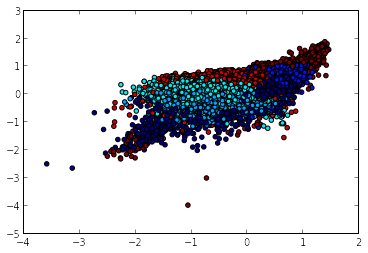

In [51]:
plt.scatter(pro.iloc[2], pro.iloc[3], c=lbl)

In [40]:
prob = gmm.predict_proba(pro.T)

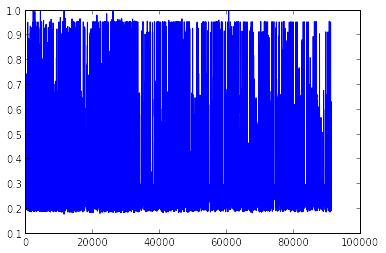

In [44]:
plt.plot(prob.max(axis=1))

In [37]:
import sys
sys.path.append('/home/mdesnoyer/src/neon2')


In [38]:
import model.customer_specific.gopro
pred = model.customer_specific.gopro.GoProPredictor()
pred._gmm = gmm

ImportError: cannot import name features

In [39]:
import dill as pickle
with open('/data/neon/gopro/gopro_20160829.gmm', 'wb') as f:
    pickle.dump(gmm, f, 2)